<a href="https://colab.research.google.com/github/ekdlakdl12/intel/blob/main/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
#import
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
from sklearn.datasets import load_iris  #iris

iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [8]:
print(iris.feature_names) #피처가 4개여서 시각화가 불가능

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [17]:
from sklearn.preprocessing import StandardScaler   # 피처 데이터 표준화
                                                   # StandardScaler 사용하여 평균0 분산1으로 데이터 스케일링
scaler = StandardScaler()
data_scaled = scaler.fit_transform(iris_df)

In [11]:
from sklearn.decomposition import PCA  #차원축소

pca = PCA(n_components=2)
pca.fit(data_scaled) 
df_pca = pca.transform(data_scaled)
print(df_pca.shape)

(150, 2)


In [12]:
df_pca = pd.DataFrame(data=df_pca)
df_pca["target"] = iris.target
df_pca.head()

,0,1,target
0,-2.576120,0.474499,0
1,-2.415322,-0.678092,0
2,-2.659333,-0.348282,0
3,-2.601991,-0.603306,0
4,-2.683744,0.640220,0


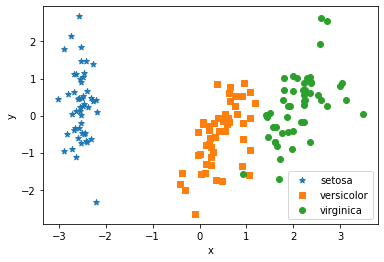

In [13]:
markers = ["*", "s", "o"] 

for i, marker in enumerate(markers):
  x_val = df_pca[df_pca["target"] ==i][0] 
  y_val = df_pca[df_pca["target"]==i][1] 
  plt.scatter(x_val, y_val, marker=marker,label=iris.target_names[i]) 
plt.legend() 
plt.xlabel("x") 
plt.ylabel("y") 
plt.show() 

In [14]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import cross_val_score 

In [15]:
rf = RandomForestClassifier() 
scores = cross_val_score(rf, iris.data, iris.target, scoring="accuracy",cv=3) 
print("원본 데이터 예측 정확도 : ", round(np.mean(scores),4))

원본 데이터 예측 정확도 :  0.9533


In [16]:
rf = RandomForestClassifier() 
scores = cross_val_score(rf, df_pca.iloc[:,:-1], iris.target, scoring="accuracy", cv=3) 
print("pca 후 예측 정확도 : ", round(np.mean(scores),4))

pca 후 예측 정확도 :  0.9867
